<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/practicando_DS_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df_wine= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinnity of ash', 'magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'proline']

In [4]:
#distintos clases de etiquetas
import numpy as np
print('Valor de las etiquetas de clase', np.unique(df_wine['Class label']))

Valor de las etiquetas de clase [1 2 3]


In [5]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinnity of ash,magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#Comprobando valores nulos
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinnity of ash              0
magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoids phenols           0
Proanthocyanins                 0
color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

In [7]:
#representación por etiquetas
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [8]:
#subdividir el dataframe en datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [9]:
#vamos a estandarizar los datos
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)
X_test_std = standardScaler.transform(X_test)


In [10]:
#probando coon penalizacón L1
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty='l1', C=1.0, solver='saga')
lg.fit(X_train_std, y_train)
print("exactitud del entrenamiento", lg.score(X_train_std, y_train))
print("exactitud del testeo", lg.score(X_test_std, y_test))

exactitud del entrenamiento 1.0
exactitud del testeo 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [11]:
#Accediendo a las terminos de intercepcion
lg.intercept_

array([ 0.4305994 ,  0.60486523, -1.03546464])

In [12]:
#coeficientes del modelo.
lg.coef_

array([[ 0.29653409,  0.        ,  0.        , -0.74975663,  0.        ,
         0.        ,  0.33845341,  0.        ,  0.        ,  0.        ,
         0.        ,  0.26671632,  1.03001411],
       [-1.30873152, -0.35636362, -0.91419611,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.09729722,
         0.50602445,  0.        , -1.37238884],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.050684  ,  0.        ,  0.        ,  0.2182822 ,
        -0.61206487, -0.95756728,  0.        ]])

### La matriz de pesos a la cual hemos accedido mediante el atributo coef_ contiene tres filas de coeficientes de pesos, un vector de peso para cada clase. Cada fila consiste de 13 pesos donde cada uno esta multiplicado por la correspondiente caracteristica e el conjunto de datos wine de 13 dimensiones para calcular la entrada neta.

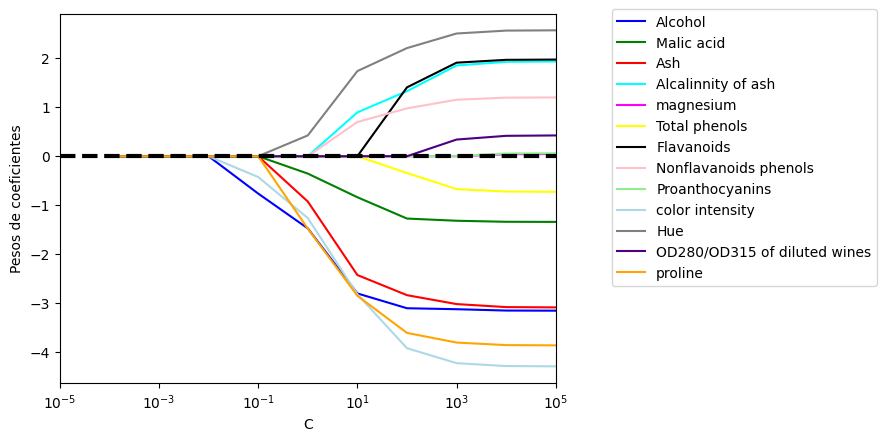

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors =["blue", "green", "red", "cyan",
         "magenta","yellow", "black", "pink",
         "lightgreen","lightblue","gray","indigo","orange"]
weights, params = [], []
for c in np.arange(-4., 6.):
  lr= LogisticRegression(penalty='l1', C=10.**c, solver='saga', random_state=0, max_iter=10000)#Con max_iter=10000 logramos que algoritmo conevrga.
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column], label=df_wine.columns[column +1 ], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Pesos de coeficientes')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03),
          fancybox=True)
plt.show()


## Crearemos un un algoritmo de selección de caracteristicas secuenciales clásico. El Seleccción Secuencial Hacia atras SBS(del ingles secuential backward selection).

In [14]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
  def __init__(self, estimator, k_features, scoring= accuracy_score, test_size=0.25, random_state=1):
    self.scoring = scoring
    self.estimator = clone(estimator)
    self.k_features = k_features
    self.test_size = test_size
    self.random_state = random_state

  def fit(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= self.test_size, random_state= self.random_state)
    dim = X_train.shape[1]
    self.indices_ = tuple(range(dim))
    self.subsets_ = [self.indices_]
    score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
    self.scores_= [score]
    while dim> self.k_features :
      scores =[]
      subsets = []
      for p in combinations(self.indices_, r=dim-1):
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        scores.append(score)
        subsets.append(p)

      best = np.argmax(scores)
      self.indices_ = subsets[best]
      self.subsets_.append(self.indices_)
      dim-=1
      self.scores_.append(scores[best])
    self.k_score_ = self.scores_[-1]
    return self

  def transform(self, X):
    return X[:, self.indices_]
  def _calc_score(self,X_train, y_train, X_test, y_test, indices ):
    self.estimator.fit(X_train[:, indices], y_train)
    y_pred = self.estimator.predict(X_test[:, indices])
    score = self.scoring(y_test, y_pred)
    return score


In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)


In [16]:
k_feat= [len(k) for k in sbs.subsets_]

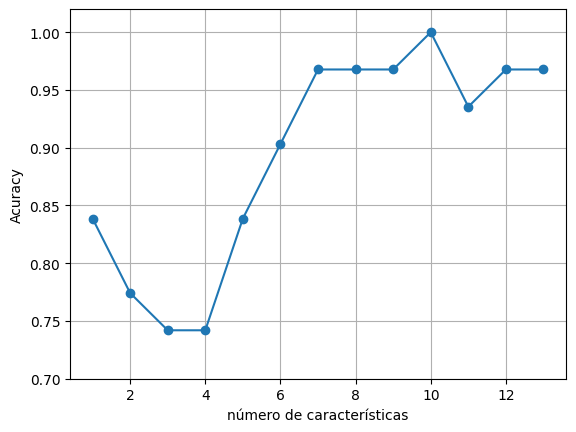

In [17]:
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Acuracy')
plt.xlabel('número de características')
plt.grid()
plt.show()

In [18]:
k3=list(sbs.subsets_[6])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinnity of ash', 'magnesium',
       'Total phenols', 'Flavanoids'],
      dtype='object')


In [19]:
# Reduciendo el dataset a 7 caracteristicas en lugar de 13, cobtenemos una precisión del 94,5%
knn.fit(X_train_std[:,k3], y_train)
print(knn.score(X_test_std[:,k3], y_test))

0.9444444444444444


In [20]:
#con el dataset completo( las 13 caracteristicas) tendríamos una precisión del 96,3%
knn.fit(X_train_std, y_train)
print(knn.score(X_test_std, y_test))

0.9629629629629629


## Con el ejemplo anterior logramos reducir de 13 dimensiones a solamente 7, con una perdida mínima del 1.8% en la precisión del modelo.

#Evaluar la importancia de caracteristicas con bosuqes aleatorios.

## Mediante un bosque aleatorio podemos medir la importancia de la caraterisitica sin realizar suposiciones de que nuestros datos son separables linealmente o no. La implementación de scikit-learn ya recoge los valores de la importancia de las caracterisiticas y podemos acceder a ellos mediante el atributo feature_importances_ después de ajustar el clasificador.   

In [21]:
from sklearn.ensemble import RandomForestClassifier
etiquetas = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importancia = forest.feature_importances_
indices = np.argsort(importancia)[::-1]

In [22]:
print("\t\t importancia de caracterisitcas: \n\n")
for f in range(X_train.shape[1]):
  print('\t %2d) %-*s %f'%(f+1, 40,
                        etiquetas[indices[f]],
                        importancia[indices[f]]))

		 importancia de caracterisitcas: 


	  1) proline                                  0.185453
	  2) Flavanoids                               0.174751
	  3) color intensity                          0.143920
	  4) OD280/OD315 of diluted wines             0.136162
	  5) Alcohol                                  0.118529
	  6) Hue                                      0.058739
	  7) Total phenols                            0.050872
	  8) magnesium                                0.031357
	  9) Malic acid                               0.025648
	 10) Proanthocyanins                          0.025570
	 11) Alcalinnity of ash                       0.022366
	 12) Nonflavanoids phenols                    0.013354
	 13) Ash                                      0.013279


## Graficando los resultados.

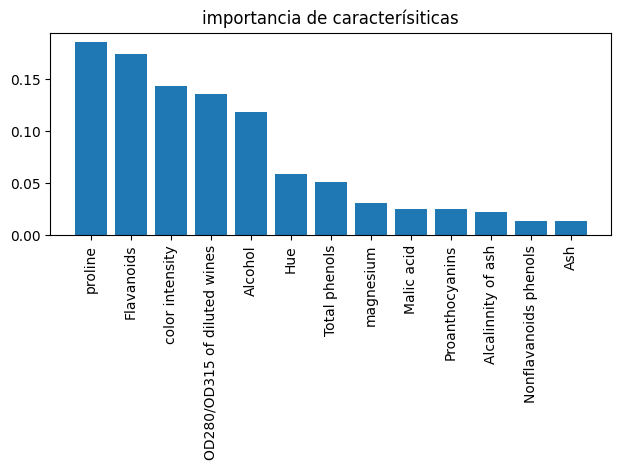

In [23]:
plt.title('importancia de caracterísiticas')
plt.bar(range(X_train.shape[1]), importancia[indices], align='center')
plt.xticks(range(X_train.shape[1]), etiquetas[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## Scikit-learn también implementa un objeto SelectFromModel que selecciona características basadas en un umbral definido por el usuario.

In [24]:
# Seleccionando las caracterisicas que obtengan una puntuacion 0.1 o mayor
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('número de muestras que coninciden con el criterio: ', X_selected.shape[0])

número de muestras que coninciden con el criterio:  124


In [25]:
print("\t\t importancia de caracterisitcas: \n\n")
for f in range(X_selected.shape[1]):
  print('\t %2d) %-*s %f'%(f+1, 40,
                        etiquetas[indices[f]],
                        importancia[indices[f]]))

		 importancia de caracterisitcas: 


	  1) proline                                  0.185453
	  2) Flavanoids                               0.174751
	  3) color intensity                          0.143920
	  4) OD280/OD315 of diluted wines             0.136162
	  5) Alcohol                                  0.118529


# Comprimir datos mediante la reducción de dimensionalidad.
## Análisis de componentes principales.

### Si utlizamos ACP para reducción de dimensionalidad, construimos una matriz $W$ de transformación de $d$ X $k$ dimensiones que nos permite mapear un vector $x$ de muestra en un subespacio de características de $K$ dimensiones con menos dimensiones que el espacio de caracteristicas de $D$ dimensiones original.
### Las direcciones ACP son sensibles al escalado de datos y necesitamos estandarizar las características antes que el ACP.  

### Vamos a resumir los pasos del Algoritmo ACP
1. Estandarizar el conjunto de datos.
2. Construir la matriz de covarianza.
3. Descomprimir la matriz en autovectores y autovalores.
4. Ordenar los autovalores por orden decreciente para clasifiicar los autovectores.
5. Seleccionar $k$ autovectoresque corresponden a los $k$ autovalores mayores, donde $k$ es la dimensionalidad del nuevo subespacio de caracteristicas($k$ <= $d$).
6. Construir una matriz de proyección $W$ a partir de los $k$ autovectores \<top>.
7. Transformar el conjunto de datos de entrada $X$ de $d$ dimensiones para obtener el nuevo subespacio de caracteristicas de $k$ dimensiones.     

In [26]:
# Abordaremos los primeros 4 pasos del ACP.
from sklearn.model_selection import train_test_split
X, Y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [27]:
#estandarizar las caracteristicas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

### Despúes de completar el preprocesamiento anterior pasamos al segundo paso: Construir la matriz de covarianza $d$ X $d$ dimensiónes simétricas. los autovetores representan los componenetes principales, mientras que los autovalores definen su mágnitud

In [28]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
valores_propios, valores_vectoriales = np.linalg.eig(cov_mat)
print('\n Valores propios \n%s'%valores_propios)


 Valores propios 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [29]:
tot = sum(valores_propios)
var_exp = [(i / tot) for i in sorted(valores_propios, reverse=True)]
cum_var_exp= np.cumsum(var_exp)

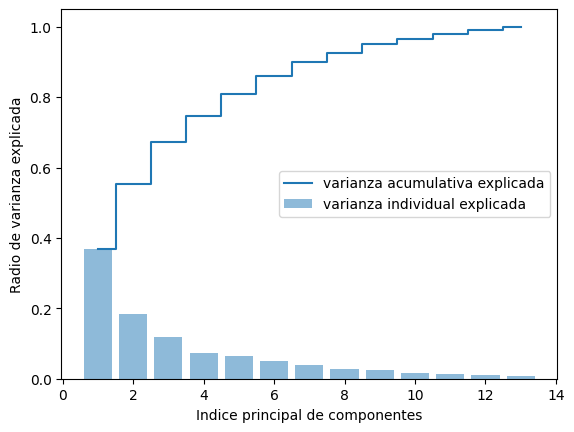

In [30]:
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='varianza individual explicada')
plt.step(range(1,14), cum_var_exp, where='mid', label='varianza acumulativa explicada')
plt.ylabel('Radio de varianza explicada')
plt.xlabel('Indice principal de componentes')
plt.legend(loc='best')
plt.show()

## Transformación de características.
### Tras haber descompuesto la matriz de covarianza, seguimos con los siguientes pasos.
1. Seleccionar $k$ autovectores que corresponden a $k$ autovalores mayores.
2. Construir una matriz de proyección $W$ a partir de los $k$ autovectores primeros ordenados descendientemente.
3. Transformar el conjunto de datos de entrada $X$ de $d$ dimensiones para obtenerel nuevo espacio de subcaraterísticas de $k$ dimensiones.

In [31]:
#Hacer una lista de las tuplas (autovalor, autovector)
pares_propios = [(np.abs(valores_propios[i]), valores_vectoriales[:,i]) for i in range(len(valores_propios))]
#ordenar las tuplas(autovalor, autovector) de mayor a menor.
pares_propios.sort(key=(lambda k: k[0]), reverse=True)

In [32]:
#Tomamos 2 autovectores solamente como ejercicio para poder graficar.
#We take 2 eigenvectors only as an exercise to be able to plot.
w = np.hstack((pares_propios[0][1][:, np.newaxis], pares_propios[1][1][:, np.newaxis]))
#mostramos la matriz
#we show the matrix
print('Matriz W :\n', w)

Matriz W :
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### Con la matriz de proyección, ahora podemos transformar una muestra $x$ en el subespacio ACP(los componentes principales 1 y 2 en este caso) se obtiene $x'$, en este caso un vector bidimensional que consta de dos caracteristicas: $$x' = xW$$ de forma parecida podemos todo el conjunto de entrenamiento en los dos componentes principales calculando el producto escalar de matrices. $$X'= XW$$

In [33]:
#Trasnformando solo una muestra
#Transforming just a sample
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [34]:
#Transformando todo el conjunto de datos.
X_train_pca = X_train_std.dot(w)

### Para terminar, vamos a graficar el conjunto de datos Wine mediante un diagrama de dispersión bidimensional.

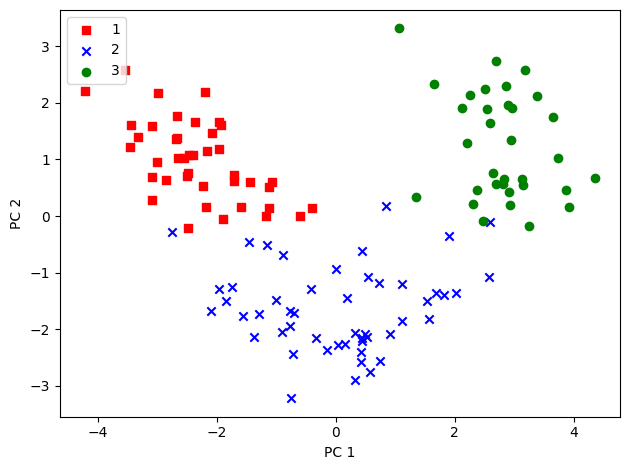

In [35]:
colores = ['r','b','g']
marcadores = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colores, marcadores):
  plt.scatter(X_train_pca[y_train== l, 0], X_train_pca[y_train== l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Análisis de componentes principales en scikit-learn.

In [36]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution = 0.02):
  #definir un generador de marcadores
  marcadores = ("s","x","o","^","*")
  colores = ('red','blue','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colores[:len(np.unique(y))])

  #representar la superficie de desicion
  x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)
                              )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha= 0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #representar muestras de clase.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
               y=X[y == cl, 1],
               alpha= 0.8,
               c=colores[idx],
               marker=marcadores[idx],
               label= cl
               )

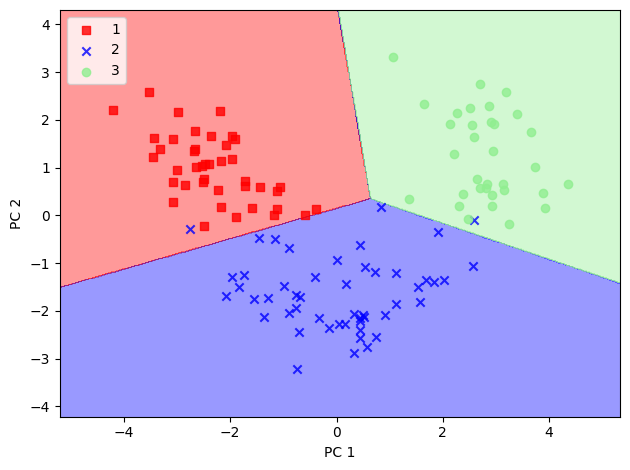

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
#Varianza explicada de todos los componentes del dataset wine
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

#Compresión de datos supervisados mediante análisis discriminante lineal.
## Podemos resumir el ADL en los siguientes pasos:
1. Estandarizar el conjunto de datos de $d$ dimensiones.
2. Para cada clase, calcular el vector medio de $d$ dimensiones.
3. Construir la matriz de dispersión entre la clase $S_{b}$ y la matriz de dispersión dentro de las clases $S_{w}$
4. Calcular los autovectores y autovalores correspondientes de la matriz $S^{-1}_{w}$ $S_{b}$.
5. ordenar los autovalores en orden decreciente para clasificar los autovectores.
6. Elegir los $k$ autovectoresque corresponden a los $k$ autovalores más altos para construir una matriz de transformación $W$ de $d$x$k$ dimensiones; los autovectores son las columnas de esta matriz.
7. Proyectar las muestras en el nuevo subespacio de características mediante la matriz de transformación $W$.  




In [39]:
#Como ya estandarizamos anteriormente los datos, podemos continuar
#con el cálculo de los vectores medios.
np.set_printoptions(precision=4)
vectores_medios=[]
for etiqueta in range(1,4):
  vectores_medios.append(np.mean(X_train_std[y_train==etiqueta], axis=0))
  print('VM %s: %s\n'%(etiqueta,vectores_medios[etiqueta-1]))

VM 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

VM 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

VM 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [40]:
# Con los vectores medios ya podemos calcular
#la matriz de dispersion.
d = 13 # número de caracteristicas.
S_W = np.zeros((d,d))
for etiqueta, VM, in zip(range(1,4), vectores_medios):
  class_scatter = np.zeros((d,d))
  for fila in X_train_std[y_train==etiqueta]:
    fila, VM = fila.reshape(d,1), VM.reshape(d,1)
    class_scatter+= (fila-VM).dot((fila-VM).T)
  S_W += class_scatter

print('Matriz de dispersión de la clase: %sx%s'%(S_W.shape[0], S_W.shape[1]))


Matriz de dispersión de la clase: 13x13


In [41]:
#mostrando la distribucin de etiquetas
print('distribución de etiquetas de clase: %s'%(np.bincount(y_train)[1:]))

distribución de etiquetas de clase: [41 50 33]


### Cuando dividimos las matrices de dispersión por el número de muestras de clase $n$, podemos observar que calcular la matriz de dispersión es, de hecho, lo mismo que calcular la matriz de covarianza.

In [42]:
#Calculando la matriz de covarianza.
d = 13 # número de caracteristicas.
S_W = np.zeros((d,d))
for etiqueta, VM, in zip(range(1,4), vectores_medios):
  class_scatter = np.cov(X_train_std[y_train==etiqueta].T)
  S_W += class_scatter

print('Matriz de dispersión escalada: %sx%s'%(S_W.shape[0], S_W.shape[1]))

Matriz de dispersión escalada: 13x13


### Después de calcular la matriz de dispersón escalada dentro de las clases(o matriz de covarianza), podemos pasar a calcular la matriz de dispersión entre clases $S_{b}$

In [43]:
mean_overall = np.mean(X_train_std, axis=0) #media general
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(vectores_medios):
  n = X_train[y_train== i+1, :].shape[0]
  mean_vec = mean_vec.reshape(d,1) #hace el vector columna.
  mean_overall = mean_overall.reshape(d,1)
  S_B += n*(mean_vec-mean_overall).dot((mean_vec - mean_overall).T)
print('Matriz de dispersión entre clases: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Matriz de dispersión entre clases: 13x13


## Seleccionar discriminantes lineales para el nuevo subespacio de caracteristicas.

In [44]:
eigen_vals, eigen_vect = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vect[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Valores propios en orden descendente: \n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Valores propios en orden descendente: 

349.61780890599397
172.7615221897938
3.342838214841367e-14
2.842170943040401e-14
2.5545786180111422e-14
1.7533939180734234e-14
1.7533939180734234e-14
1.6579193995960903e-14
1.6579193995960903e-14
8.242524002707225e-15
8.242524002707225e-15
6.36835506006027e-15
2.974634375545734e-15


### En ADL el número de discriminantes lineales es como máximo $c$-1, donde $c$ es el número de etiquetas de clase, mientras que la matriz de dispersión intermedia $S_{b}$ es la suma de $c$ matrices con una clasificación de 1 o menos.

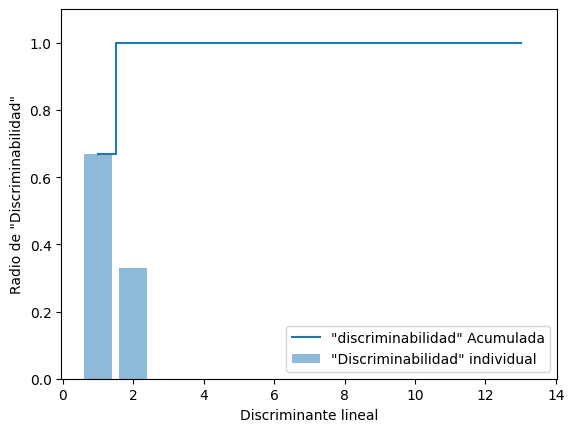

In [45]:
#vamos a representar los discriminantes lineales reduciendo los autovalores.
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha=0.5, align='center',
        label='"Discriminabilidad" individual')
plt.step(range(1,14), cum_discr, where='mid',
         label='"discriminabilidad" Acumulada')
plt.ylabel('Radio de "Discriminabilidad"')
plt.xlabel('Discriminante lineal')
plt.ylim([-0.0, 1.1])
plt.legend(loc='best')
plt.show()

### Vamos a agrupar las dos columnas de los autovectores más discriminativos para crear la matriz de transformación $W$.

In [46]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
print('Matriz W: \n', W)

Matriz W: 
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


## Proyectar muestras en el nuevo espacio de características.

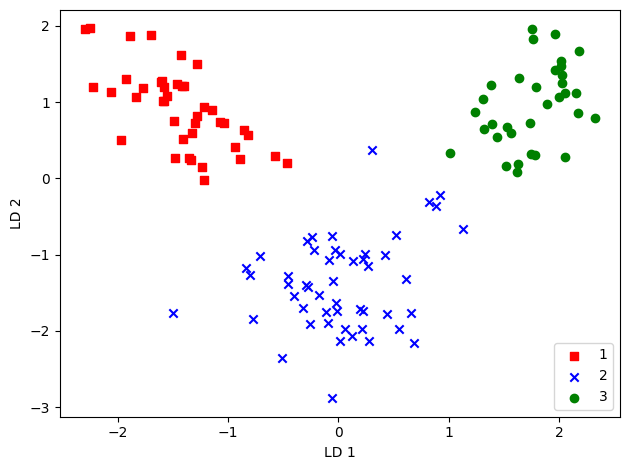

In [47]:
X_train_lda = X_train_std.dot(W)
colores = ['r','b','g']
marcadores = ['s','x','o']
for l, c, m in zip(np.unique(y_train), colores, marcadores):
  plt.scatter(X_train_lda[y_train== l, 0], X_train_lda[y_train== l, 1]*(-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# ADL con scikit-learn

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

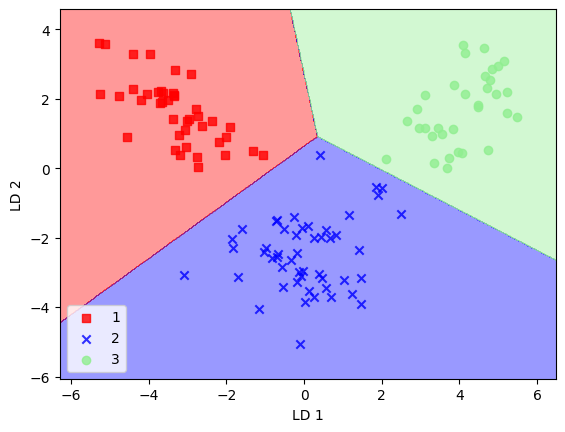

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100)
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [50]:
lr.coef_

array([[-4.4913,  1.3278],
       [ 0.1057, -4.3593],
       [ 4.3856,  3.0314]])

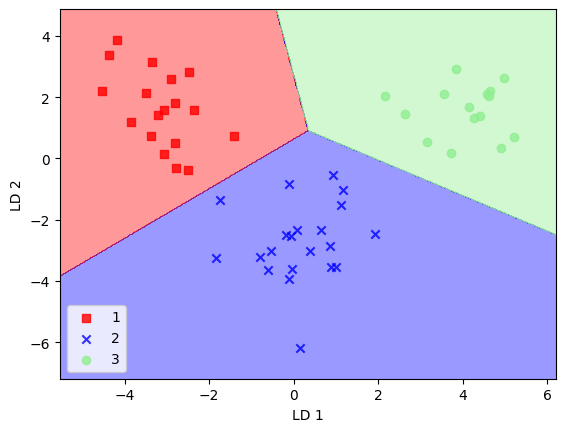

In [51]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

# Utilizar el análisis de componentes principales con kernels para mapeos no lineales.


### Lo que obtenemos con una ACP kernelizada son las muestras ya proyectadas en los respectivos componentes, en lugar de construir una matriz de transformación como en el enfoque ACP estandar. La función kernel se puede entender como una función que calcula un producto escalar entre dos vectores( Una medida de semejanza).

In [52]:
# Implementar un ACP kernelizada con python
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF Kernel pca implementation.
  parameters
  -----------------
  X: {numpy ndarray}, shape=[n_samples, n_features]
  gamma: float
    tunning parameters of the RBF kernel
  n_components: int
    number of principal components to return
  returns
  ------------
  X_pc: {numpy ndarray}, shape=[n_samples, n_features]
    projected dataset.
  """
  #Calcular pares de distancias euclidianas al cuadrado.
  #en el conjunto de datos MxN.
  sq_dist = pdist(X, 'sqeuclidean')
  #Convertir los pares de distancias en una matriz cuadrada
  mat_sq_dist = squareform(sq_dist)
  #calcular la matriz de kernel simétrica.
  K = exp(-gamma * mat_sq_dist)
  #centrar la matriz de kernel
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  #Obtener autopares a partir de la matriz de kernel centrada.
  #scipy.linalg.eigh los devuelve de manera ascendente.
  eigvals, eigvect = eigh(K)
  eigvals, eigvect = eigvals[::-1], eigvect[:, ::-1]
  #Tomar los primeros autovectores K (Muestras proyectadas)
  #X_pc = np.column_stack((eigvect[:, i] for i in range(n_components)))
  #La linea anterior daba error.
  #np.column_stack espera una lista como argumento
  X_pc = np.column_stack([eigvect[:, i] for i in range(n_components)])
  return X_pc


### Ejemplo 1 separar formas de madialuna

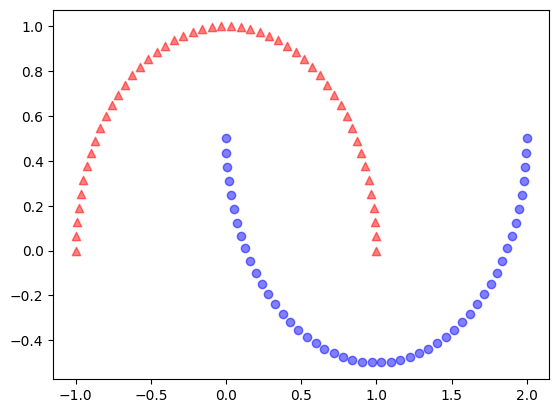

In [53]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

### Evidentemente estas dos formas de media luna no son linealmente separables y deseamos desplegarlas mediante el ACP kernelizado para que sirva de entrada adecuada para un clasificador lineal.

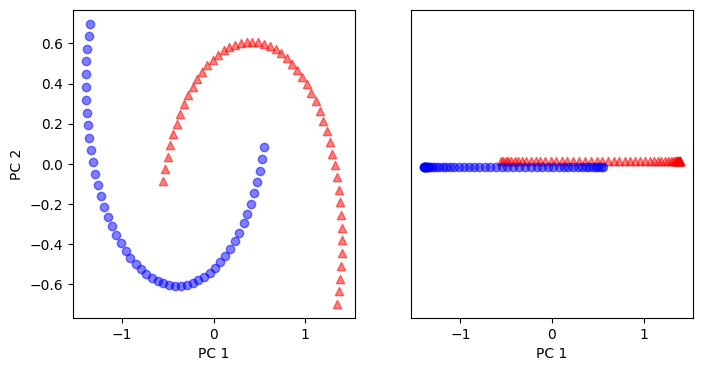

In [54]:
#vamos a probar primero con el acp estandar
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((50, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

<ipython-input-52-b89852b37731>:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dist)


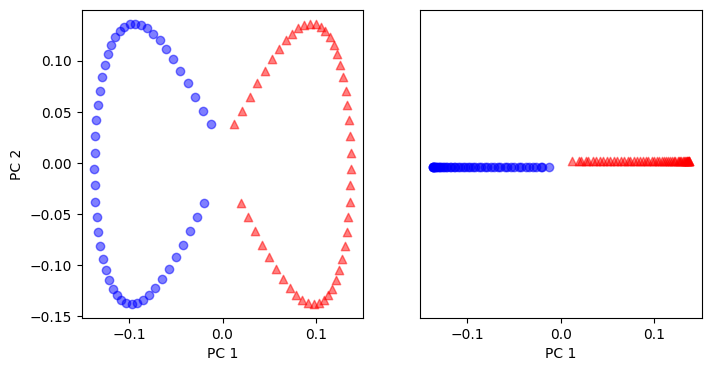

In [55]:
#Ahora vamos a probar nuestra función de acp kernelizada.
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((50, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((50, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

### Ahora podemos verque las dos clases( Circles y triangles) están linealmente bien separadas.  

## Ejemplo 2: separar círculos concéntricos.

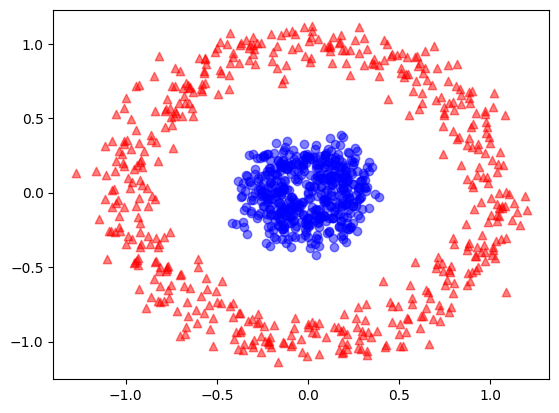

In [56]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.show()

Text(0.5, 0, 'PC 1')

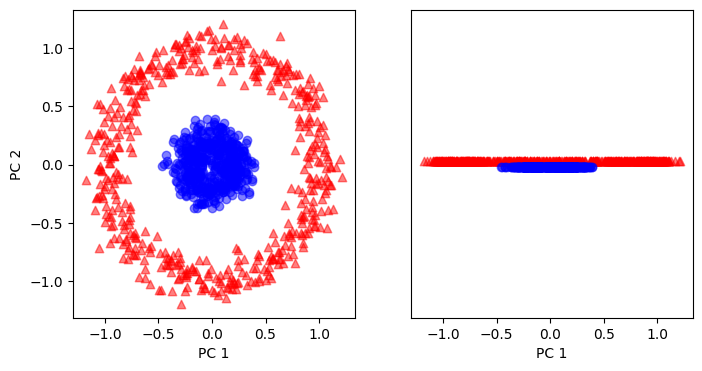

In [57]:
#vamos a probar primero con el acp estandar
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_spca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')

### Nuevamente nos encontramos que el ACP estándar no es capaz de producir resultados adecuados para un clasificador lineal.

### Vamos a tratar de dar un valor apropiado para gamma &gamma; ya que encontrar un buen valor es clave para el ACP kernelizado funcione optimamente.

<ipython-input-52-b89852b37731>:28: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dist)


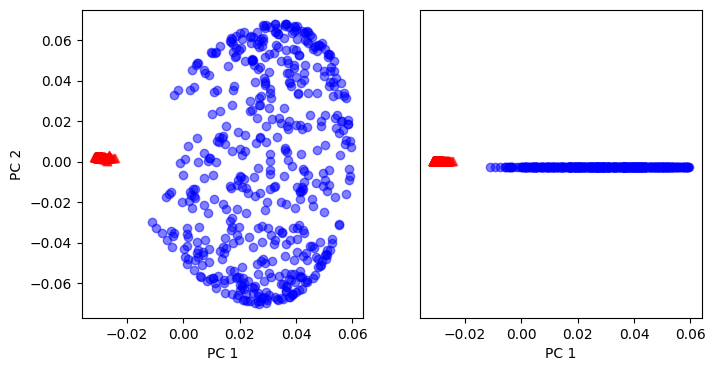

In [58]:
#Ahora vamos a probar con nuestra función de acp kernelizada.
X_kpca = rbf_kernel_pca(X, gamma=15, n_components=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
ax[1].scatter(X_kpca[y==0, 0], np.zeros((500, 1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1, 0], np.zeros((500, 1))-0.02, color='blue', marker='o', alpha=0.5)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC 1')
plt.show()

### Una vez más, el ACP con kernels de RBF ha proyectado los datos en un nuevo subespacio donde las dos clases pasan a ser separables linealmente.

# Proyectar nuevos puntos de datos
## si queremos proyectar una nueva muestra $x'$ en este eje del componente principal, necesitamos calcular lo siguiente $${\phi(x')^T v}$$ podemos utilizar el truco del kerne para no tener que calcular la proyección explicitamente.
## Cabe resaltar que el ACP con kernel es un método basado en memoria, lo que significa que debemos reutilizar el conjunto de entrenamiento original cada ves que proyectamos nuevas muestras.

### los autovectores $a$ y los autovalores λ de la matriz del kernel $K$ cumplen la siguiente condición: $$K.a= λ.a$$
### Después de calcular la semejanza entre nuevas muestras y las muestras del conjunto de entrenamiento, debemos normalizar el autovector $a$ mediante su autovalor.   

In [59]:
# Modificamos la funcion rbf_kernel_pca
# para que devuelva tambien los autovalores
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
  """
  RBF Kernel pca implementation.
  parameters
  -----------------
  X: {numpy ndarray}, shape=[n_samples, n_features]
  gamma: float
    tunning parameters of the RBF kernel
  n_components: int
    number of principal components to return
  returns
  ------------
  X_pc: {numpy ndarray}, shape=[n_samples, n_features]
    projected dataset.
  """
  #Calcular pares de distancias euclidianas al cuadrado.
  #en el conjunto de datos MxN.
  sq_dist = pdist(X, 'sqeuclidean')
  #Convertir los pares de distancias en una matriz cuadrada
  mat_sq_dist = squareform(sq_dist)
  #calcular la matriz de kernel simétrica.
  K = exp(-gamma * mat_sq_dist)
  #centrar la matriz de kernel
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  #Obtener autopares a partir de la matriz de kernel centrada.
  #scipy.linalg.eigh los devuelve de manera ascendente.
  eigvals, eigvect = eigh(K)
  eigvals, eigvect = eigvals[::-1], eigvect[:, ::-1]
  #Tomar los primeros autovectores K (Muestras proyectadas)
  #X_pc = np.column_stack((eigvect[:, i] for i in range(n_components)))
  #La linea anterior daba error.
  #np.column_stack espera una lista como argumento
  alpha = np.column_stack([eigvect[:, i] for i in range(n_components)])
  lambdas = [eigvals[i] for i in range(n_components)]
  return alpha, lambdas

### Vamos a crear un nuevo conjunto de datos y lo proyectaremos en nuevo espacio unidimensional.

In [61]:
X, y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X, gamma=15, n_components=1)


<ipython-input-59-4cfce3e622ac>:29: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  K = exp(-gamma * mat_sq_dist)


In [62]:
#Vamos a suponer que el punto 26 del conjunto de datos
#es un nuevo punto de datos.
X_new = X[25]
print(X_new)

[1.8713 0.0093]


In [64]:
X_proj = alphas[25] #original proyeccion
print(X_proj)

[-0.0788]


In [65]:
def project_x(X_new, X, gamma, alphas, lambdas):
  pair_dist = np.array([np.sum((X_new-row)**2)for row in X])
  K = np.exp(-gamma* pair_dist)
  return K.dot(alphas/ lambdas)


In [66]:
X_reproject = project_x(X_new, X, gamma=15, alphas=alphas, lambdas=lambdas)
print(X_reproject)

[-0.0788]


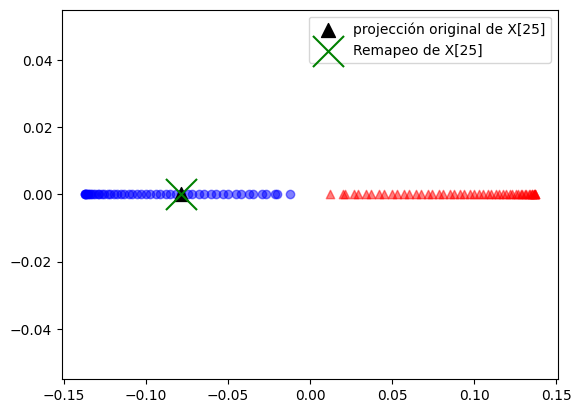

In [67]:
#Vamos a visualizar la proyeccion.
plt.scatter(alphas[y==0, 0], np.zeros((50)), color='red', marker='^', alpha=0.5)
plt.scatter(alphas[y==1, 0], np.zeros((50)), color='blue', marker='o', alpha=0.5)
plt.scatter(X_proj, 0, color='black', label='projección original de X[25]', marker='^', s=100)
plt.scatter(X_reproject, 0, color='green', label='Remapeo de X[25]', marker='x', s=500)
plt.legend(scatterpoints=1)
plt.show()

# Análisis de componentes principales con kernel en scikit-learn.
## Scikit-learn ya implementa una clase ACP con kernels en su submódulo sklearn.decomposition, es parecido a la clase ACP estándar y podemos especificar el kernel con el parámetro keernel.


In [68]:
from sklearn.decomposition import KernelPCA
X, y = make_moons(n_samples=100, random_state=123)
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

### Para comprobar que obtenemos resultados vamos a mostrar gráficamente los datos con forma de media luna transformados en los dos primeros componentes principales.


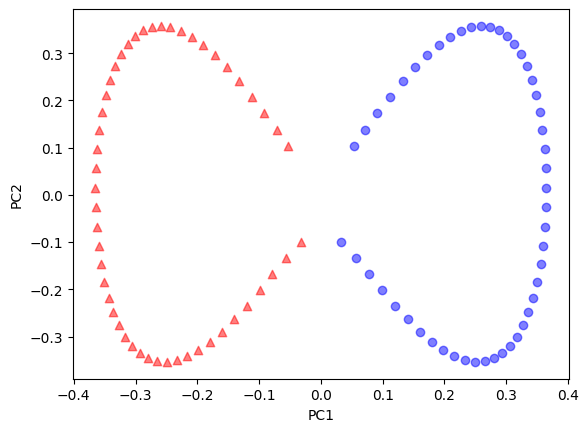

In [69]:
plt.scatter(X_skernpca[y==0, 0], X_skernpca[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()